# The Perceptron Algorithm

A Perceptron is a system that learns using labeled examples of feature vectors, mapping these inputs to their corresponding output class labels. In its simplest form, a Perceptron contains N input nodes, one for each entry in the input row, followed by only one layer in the network with just a single node in that layer.

Training a Perceptron is a fairly straightforward operation. Our goal is to obtain a set of weights *w* that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector _w_ can be learned to linearly separate our two classes of data.

![Perceptron](https://drive.google.com/uc?id=1K7olbB11mSfAwPmB8BeeRNe6XbuGSK4D)

The pseudocode is the following:
1. Initialize our weight vector w with small random values
2. Until Perceptron converges
    1. Loop over each input and class label
    2. Take $x$ and pass it through the network, calculating the output value: $y = (w · x)$
    3. Update the weights: if ŷ = 0 --> $w_i = w_i + \alpha x_i$, if ŷ = 1 --> $w_i = w_i - \alpha x_i$
        

In [18]:
import random, math, numpy as np, matplotlib.pyplot as pl

In [19]:
class Perceptron:        
    """Perceptron class

        Args:
            M: Number of inputs
            alpha: Learning rate
        
        Attributes:
            W: The weights for the perceptron
            b: bias
            alpha: The learning rate
    """
    def __init__(self, N, alpha=0.1):        
        # Creates an array of N weights and initializes with random values
        # define iputs
        self.error_graph=[]
        self.epochn=[]
        self.alpha=alpha
        self.N = N
        self.W = np.array([[np.random.uniform(-1,1)] for _ in range(2) ]) # random initial weights
        self.b = random.uniform(-1, 1) # random initial b
            
    def sigmoid(self, x):
        return 1/(1+(math.e)**(-x))

    def error(self, y_hat, y ):
        """
            Calculates the error of the perceptron

            Args:
                y_hat: The predicted output
                y: The actual output
        """
        return -(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

    def predict(self, x):

        """
            Makes a prediction for the specified input
            
            Args:
                x: Input to make a prediction on.
        """
        
        return self.sigmoid(np.dot(self.W.T,x)+self.b)
    
    def perceptronStep(self, X, y):
        """
            The perceptron basic step. It updates the weights based on the input data.
            
            Args:
                X: Array with the input data
                y: Data labels
        """
        y_hat=0
        b=0
        w1=0
        w2=0
        dy=0
        error=0
        
        for i in range(self.N):
            y_hat=self.predict(X[i])
            error+=self.error(y_hat, y[i])
            dy=y_hat-y[i]
            w1+=X[i][0]*dy
            w2+=X[i][1]*dy
            b+=dy
            
        w1/=1/self.N
        w2/=1/self.N
        b/=self.N
        self.W-=w1*self.alpha
        self.W-=w2*self.alpha
        self.b-=b*self.alpha
        #print(error)
        self.error_graph.append(error) 

    def train(self, X, y, epochs = 10):
        """
            Runs the perceptron step a specified number of epochs
            
            Args:
                X: input data
                y: labels
                epochs: The number of times the step is executed
        """
        for epoch in range(epochs):
            self.perceptronStep(X, y)
        pl.plot(self.error_graph)
        pl.xlabel("epochs")
        pl.ylabel("error")
        pl.show()
        return
        

----------------------
AND 

Initial weights AND [[-0.05733296]
 [-0.00676904]]


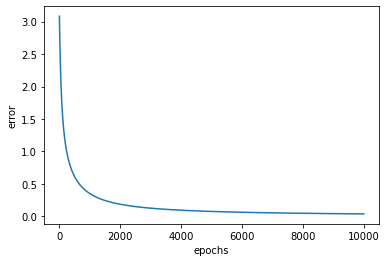

Weights after training [[8.70578807]
 [8.75635199]]
Prediction for [0,0] [2.03097475e-06]  Real value: [0]
Prediction for [0,1] [0.01273429]  Real value: [0]
Prediction for [1,0] [0.01211401]  Real value: [0]
Prediction for [1,1] [0.98732224]  Real value: [1]
----------------------
OR 

Initial weights OR [[-0.17409851]
 [-0.15097395]]


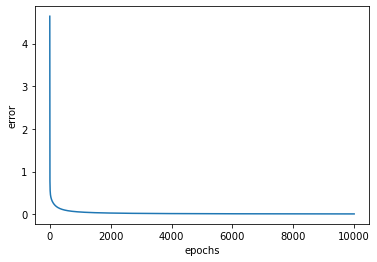

Weights after training [[13.67158965]
 [13.6947142 ]]
Prediction for [0,0] [0.00452988]  Real value: [0]
Prediction for [0,1] [0.99975209]  Real value: [1]
Prediction for [1,0] [0.99974629]  Real value: [1]
Prediction for [1,1] [1.]  Real value: [1]


In [20]:
# change the seed to see different solutions
from tkinter import Y


random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
print("----------------------")
print("AND \n")

# AND
X_and = np.array([[0,0],[0,1], [1,0], [1,1]])
y_and = np.array([[0],[0], [0], [1]])

# OR
X_or = np.array([[0,0],[0,1], [1,0], [1,1]])
y_or = np.array([[0],[1], [1], [1]])

p_and = Perceptron(4)
print(f"Initial weights AND {p_and.W}")

# Test training with different epochs
p_and.train(X_and, y_and, 10000)
print(f"Weights after training {p_and.W}")

# Test your model with a prediction
print("Prediction for [0,0]", p_and.predict([0,0]), " Real value:", y_and[0])
print("Prediction for [0,1]", p_and.predict([0,1]), " Real value:", y_and[1])
print("Prediction for [1,0]", p_and.predict([1,0]), " Real value:", y_and[2])
print("Prediction for [1,1]", p_and.predict([1,1]), " Real value:", y_and[3])


print("----------------------")
print("OR \n")

p_or = Perceptron(4)
print(f"Initial weights OR {p_or.W}")

p_or.train(X_or, y_or, 10000)
print(f"Weights after training {p_or.W}")

print("Prediction for [0,0]", p_or.predict([0,0]), " Real value:", y_or[0])
print("Prediction for [0,1]", p_or.predict([0,1]), " Real value:", y_or[1])
print("Prediction for [1,0]", p_or.predict([1,0]), " Real value:", y_or[2])
print("Prediction for [1,1]", p_or.predict([1,1]), " Real value:", y_or[3])

